In [22]:
import xarray as xr
import xcdat as xc
import regionmask
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import math

In [24]:
variable = "tasmax"
region = "DeepSouth"
anom = True

diri = f"/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/postproc/netcdf/{variable}/"
files = [f"{diri}{file}" for file in os.listdir(diri) if "monthly" not in file and (("anom" in file) if anom else ("anom" not in file))]
monthly_files = [f"{diri}{file}" for file in os.listdir(diri) if "monthly" in file and (("anom" in file) if anom else ("anom" not in file))]
num_files = len(files)
num_monthly_files = len(monthly_files)

numcols = min([num_files, 4])  # or any other number you prefer
numrows = math.ceil(num_files / numcols)

numcols_mon = min([num_monthly_files, 4])  # or any other number you prefer
numrows_mon = math.ceil(num_monthly_files / numcols_mon)

In [18]:
# Spatial averages generated using cmd
""" python spatial_average2.py -p ../param/drcdm_param-era5.py --shp_path /pscratch/sd/j/jsgoodni/shapefiles/regions_conus.shp --attribute region """

' python spatial_average2.py -p ../param/drcdm_param-era5.py --shp_path /pscratch/sd/j/jsgoodni/shapefiles/regions_conus.shp --attribute region '

<GeoAxes: >

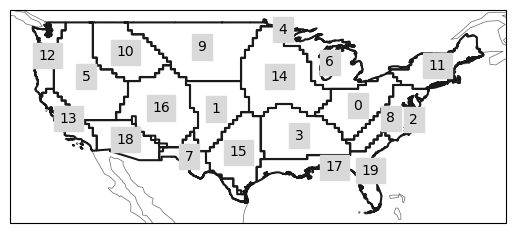

In [19]:
df = gpd.read_file("/pscratch/sd/j/jsgoodni/shapefiles/regions_conus.shp")
regionmask.from_geopandas(df).plot()

/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/postproc/netcdf/tasmax/ERA5_r1i1p1f1_annual_txx_timeseries.nc
/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/postproc/netcdf/tasmax/ERA5_r1i1p1f1_annual_tasmax_ge_100F_timeseries.nc
/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/postproc/netcdf/tasmax/ERA5_r1i1p1f1_annual_tasmax_ge_90F_timeseries.nc
/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/postproc/netcdf/tasmax/ERA5_r1i1p1f1_annual_tasmax_ge_80F_timeseries.nc
/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/postproc/netcdf/tasmax/ERA5_r1i1p1f1_mean_tasmax_timeseries.nc
/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/postproc/netcdf/tasmax/ERA5_r1i1p1f1_annual_tasmax_ge_70F_timeseries.nc
/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/postproc/netcdf/tasmax/ERA5_r1i1p1f1_annual_5day_max_tasmax_timeseries.nc


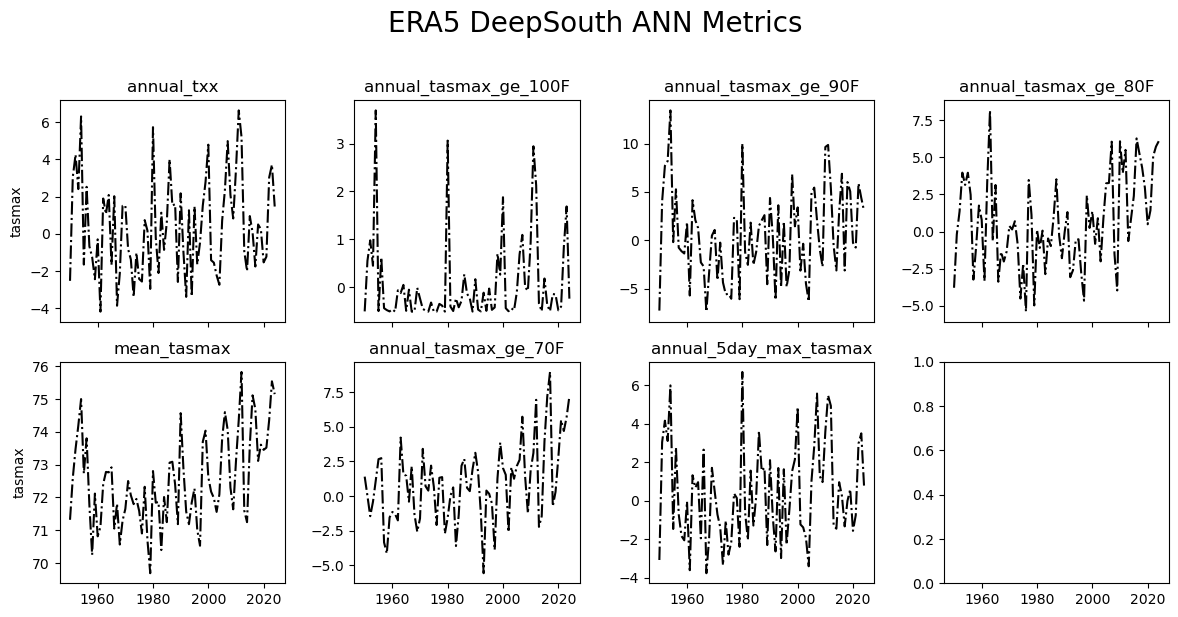

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(numrows, numcols, figsize=(12, 6), sharex=True, sharey=False)

for n, file in enumerate(files):
    print(file)
    
    row = n // 4
    col = n % 4
    if numrows > 1: 
        ax = axes[row, col]
    elif numcols > 1:
        ax = axes[col]
    else: 
        ax = axes

    ds = xr.open_dataset(file)
    var = list(ds.data_vars)[0]
    region_idx = list(ds.region.values).index(region)
    
    period = ds.period.values[0]
    rmean = ds[var].sel(region = region, period = period)

    
    time = rmean.time.dt.year.values
    season = rmean.period.data

    # Plot mean and shaded region
    region_line, = ax.plot(time, rmean, '-.', label='Mean', color = 'k')
#     #line_mean_min, = ax.plot(time, mean_min, label='Mean Tasmin', color = 'blue')

#     #line_mean_min, = ax.plot(time, mean_min, label='Mean Tasmin', color = 'blue')

#     #ax.fill_between(time, mean_max - 2*std_max, mean_max + 2*std_max, color='gray', alpha=0.3, label='±2 Std Dev')
#     #ax.fill_between(time, mean_min - 2*std_min, mean_min + 2*std_min, color='gray', alpha=0.3, label='±2 Std Dev')

    ax.set_title(var)
    if row == 2: 
        ax.set_xlabel('Year')
    if col == 0: 
        ax.set_ylabel(variable)

# # Create a single legend for the whole figure
# handles = [line_mean_max, line_mean_min]#, plt.Line2D([0], [0], color='gray', alpha=0.3, linewidth=10, label='±2 Std Dev')]
# labels = ['Annual Mean Tasmax','Annual Mean Tasmin']#, '±2 Std Dev']
# fig.legend(handles, labels, loc='center right', ncol=1, bbox_to_anchor=(1.22, 0.5))

# plt.tight_layout(rect=[0, 0, 1, 0.98])  # Leave space for legend
plt.suptitle(f"ERA5 {region} ANN Metrics", y = 1.02, fontsize=20)
plt.tight_layout()

# plt.savefig("./T_example.png", bbox_inches='tight')

/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/postproc/netcdf/tasmax/ERA5_r1i1p1f1_monthly_mean_tasmax_timeseries.nc


/tmp/ipykernel_31611/3139725338.py:25: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  time = rmean.indexes['time'].to_datetimeindex()    # Plot mean and shaded region
/tmp/ipykernel_31611/3139725338.py:25: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time = rmean.indexes['time'].to_datetimeindex()    # Plot mean and shaded region


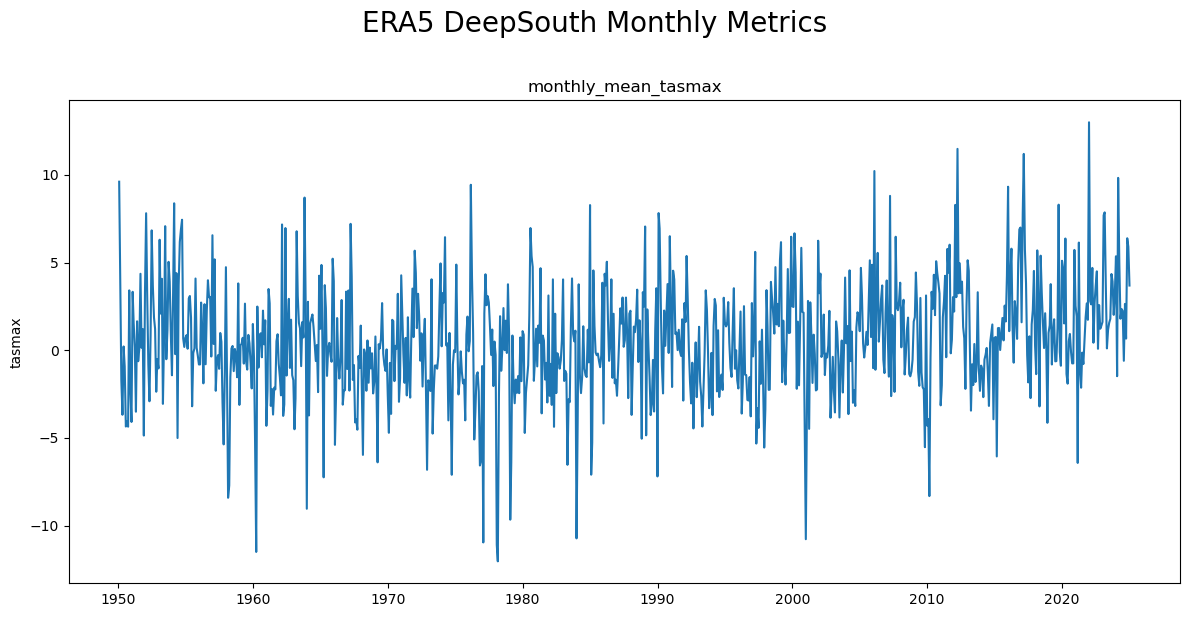

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(numrows_mon, numcols_mon, figsize=(12, 6), sharex=True, sharey=False)

for n, file in enumerate(monthly_files):
    print(file)
    
    row = n // 4
    col = n % 4
    if numrows_mon > 1: 
        ax = axes[row, col]
    elif numcols_mon > 1:
        ax = axes[col]
    else: 
        ax = axes

    ds = xr.open_dataset(file)
    var = list(ds.data_vars)[0]
    region_idx = list(ds.region.values).index(region)
    
    period = "Monthly"
    rmean = ds[var].sel(region = region)

    
    time = rmean.indexes['time'].to_datetimeindex()    # Plot mean and shaded region
    region_line, = ax.plot(time, rmean, '-', label='Mean') # color = 'k')
#     #line_mean_min, = ax.plot(time, mean_min, label='Mean Tasmin', color = 'blue')

#     #line_mean_min, = ax.plot(time, mean_min, label='Mean Tasmin', color = 'blue')

#     #ax.fill_between(time, mean_max - 2*std_max, mean_max + 2*std_max, color='gray', alpha=0.3, label='±2 Std Dev')
#     #ax.fill_between(time, mean_min - 2*std_min, mean_min + 2*std_min, color='gray', alpha=0.3, label='±2 Std Dev')

    ax.set_title(var)
    if row == 2: 
        ax.set_xlabel('Year')
    if col == 0: 
        ax.set_ylabel(variable)

# # Create a single legend for the whole figure
# handles = [line_mean_max, line_mean_min]#, plt.Line2D([0], [0], color='gray', alpha=0.3, linewidth=10, label='±2 Std Dev')]
# labels = ['Annual Mean Tasmax','Annual Mean Tasmin']#, '±2 Std Dev']
# fig.legend(handles, labels, loc='center right', ncol=1, bbox_to_anchor=(1.22, 0.5))

# plt.tight_layout(rect=[0, 0, 1, 0.98])  # Leave space for legend
plt.suptitle(f"ERA5 {region} Monthly Metrics", y = 1.02, fontsize=20)
plt.tight_layout()

# plt.savefig("./T_example.png", bbox_inches='tight')

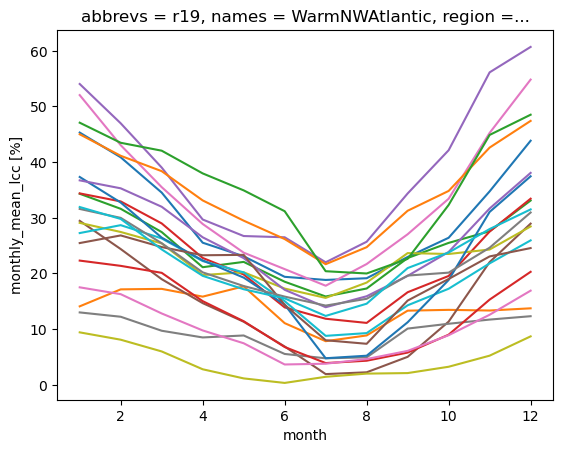

In [21]:
for region in range(len(ds.region)): 
    rmean = ds['monthly_mean_lcc'].isel(region = region)
    rmean.groupby('time.month').mean().plot()

In [20]:
ds

<xarray.Dataset> Size: 148kB
Dimensions:           (time: 864, region: 20)
Coordinates:
  * time              (time) object 7kB 1950-01-31 00:00:00 ... 2021-12-31 00...
    abbrevs           (region) <U3 240B ...
    names             (region) <U14 1kB ...
  * region            (region) <U14 1kB 'Appalachia' ... 'WarmNWAtlantic'
Data variables:
    monthly_mean_lcc  (region, time) float64 138kB ...

In [30]:
xr.open_dataset(f"/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/postproc/netcdf/lcc/ERA5_r1i1p1f1_monthly_mean_lcc_timeseries.nc")

<xarray.Dataset> Size: 148kB
Dimensions:           (time: 864, regional: 20)
Coordinates:
  * time              (time) object 7kB 1950-01-31 00:00:00 ... 2021-12-31 00...
    region            (regional) <U2 160B ...
    abbrevs           (regional) <U3 240B ...
    names             (regional) <U14 1kB ...
  * regional          (regional) <U14 1kB 'Appalachia' ... 'WarmNWAtlantic'
Data variables:
    monthly_mean_lcc  (regional, time) float64 138kB ...

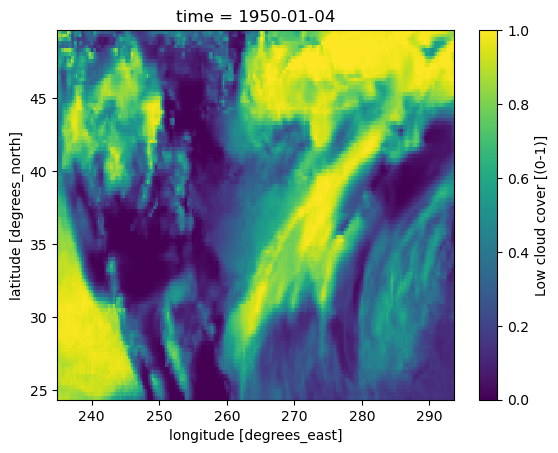

In [8]:

ds.isel(time = 3).lcc.plot()

In [22]:
f = "/pscratch/sd/j/jsgoodni/testData/ERA5/tcwv/tcwv_2005.nc"

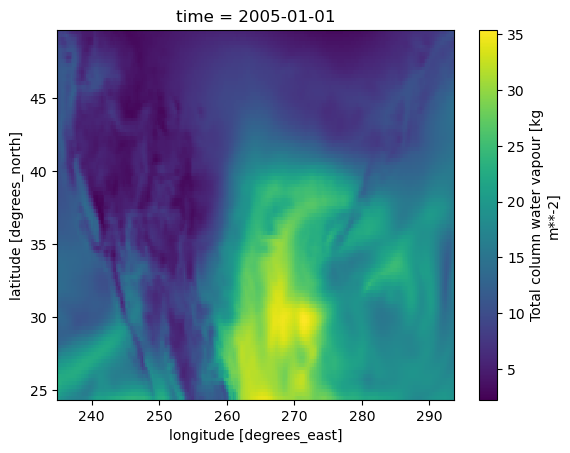

In [25]:
xr.open_dataset(f).isel(time = 0)['tcwv'].plot()

In [8]:
ds = xr.open_dataset("/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/postproc/netcdf/tasmax/ERA5_r1i1p1f1_annual_5day_max_tasmax_timeseries.nc")

                

In [12]:
ds["annual_5day_max_tasmax"].isel(period = 0, region = 0).data

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [20]:
ds = xr.open_dataset("/pscratch/sd/j/jsgoodni/pmp_results/drcdm/Observations/ERA5/netcdf/annual/tasmax/ERA5_r1i1p1f1_annual_txx.nc")

In [21]:
ds["DJF"]# .groupby("time.year").mean()

KeyError: "No variable named 'DJF'. Variables on the dataset include ['latitude', 'longitude', 'time', 'ANN', 'latitude_bnds', 'longitude_bnds', 'time_bnds']"

In [28]:
ds = xr.open_dataset("/global/cfs/projectdirs/m2637/star-esdm_nclimgrid_conus/pr/ssp245/downscaled.TaiESM1.r1i1p1f1.pr.ssp245.gn.nclimgrid.nclimgrid.2060.2069.tllc.nc", decode_times = False)

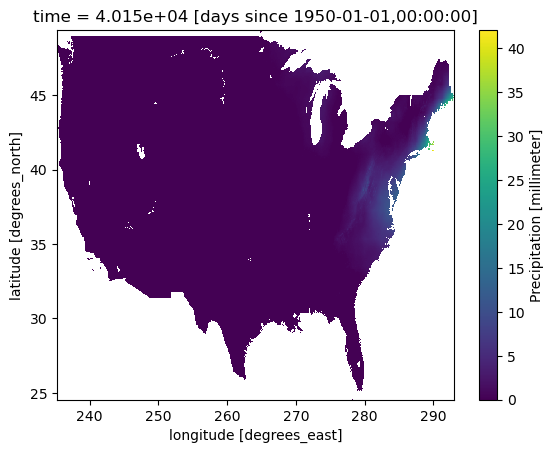

In [31]:
ds.pr.isel(time = 0).plot()

In [34]:
ds = xr.open_dataset("/global/cfs/projectdirs/m2637/star-esdm_nclimgrid_conus/tasmax/ssp245/downscaled.TaiESM1.r1i1p1f1.tasmax.ssp245.gn.nclimgrid.nclimgrid.1970.1979.tllc.nc", decode_times = False)

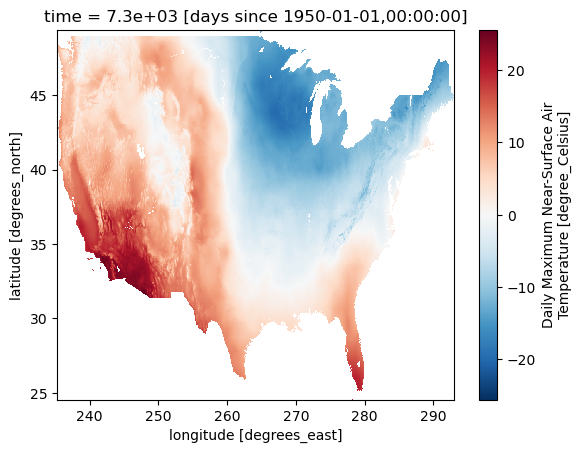

In [35]:
ds.isel(time = 0).tasmax.plot()

In [38]:
import numpy as np
np.diff(ds.latitude)

array([0.04166603, 0.04166794, 0.04166603, 0.04166603, 0.04166794,
       0.04166603, 0.04166603, 0.04166794, 0.04166603, 0.04166603,
       0.04166794, 0.04166603, 0.04166603, 0.04166794, 0.04166603,
       0.04166603, 0.04166794, 0.04166603, 0.04166603, 0.04166794,
       0.04166603, 0.04166603, 0.04166794, 0.04166603, 0.04166603,
       0.04166794, 0.04166603, 0.04166603, 0.04166794, 0.04166603,
       0.04166603, 0.04166794, 0.04166603, 0.04166603, 0.04166794,
       0.04166603, 0.04166603, 0.04166794, 0.04166603, 0.04166603,
       0.04166794, 0.04166603, 0.04166603, 0.04166794, 0.04166603,
       0.04166603, 0.04166794, 0.04166603, 0.04166603, 0.04166794,
       0.04166603, 0.04166603, 0.04166794, 0.04166603, 0.04166603,
       0.04166794, 0.04166603, 0.04166603, 0.04166794, 0.04166603,
       0.04166603, 0.04166794, 0.04166603, 0.04166603, 0.04166794,
       0.04166603, 0.04166603, 0.04166794, 0.04166603, 0.04166603,
       0.04166794, 0.04166603, 0.04166603, 0.04166794, 0.04166

In [20]:
import xarray as xr 
import os
import numpy as np

In [21]:
f = "/pscratch/sd/j/jsgoodni/pmp_results/drcdm/STAR-EDSM_ssp370_precip/netcdf/annual/pr/CanESM5_r1i1p1f1_total_pr.nc"

In [22]:
ds = xr.open_dataset(f)

In [16]:
models = os.listdir("/global/cfs/projectdirs/m2637/star-esdm_nclimgrid_conus/pr/ssp370/")

In [24]:
len(np.unique([model.split('.')[1] for model in models]))

19